In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_auc_score, classification_report


In [2]:
comp = pd.read_csv("Company_Data.csv")
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
comp["Sales"].mean()

7.496325

In [4]:
comp.loc[comp["Sales"] >= 7.5, 'sales_avg'] = "1"
comp.loc[comp["Sales"] <  7.5, "sales_avg"] = "0"
comp.drop(["Sales"],axis=1, inplace=True)
comp

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_avg
0,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,141,64,3,340,128,Bad,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,1
396,139,23,3,37,120,Medium,55,11,No,Yes,0
397,162,26,12,368,159,Medium,40,18,Yes,Yes,0
398,100,79,7,284,95,Bad,50,12,Yes,Yes,0


In [5]:
le = preprocessing.LabelEncoder()
for i in comp.columns:
    if comp[i].dtype == object:
        comp[i] = le.fit_transform(comp[i])
comp

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_avg
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,1
396,139,23,3,37,120,2,55,11,0,1,0
397,162,26,12,368,159,2,40,18,1,1,0
398,100,79,7,284,95,0,50,12,1,1,0


In [6]:
comp["sales_avg"].value_counts()

0    201
1    199
Name: sales_avg, dtype: int64

In [49]:
X = comp.iloc[:,:10]
y = comp.iloc[:, 10]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [51]:
params = [{"criterion": ["gini", "entropy"], "max_depth" : [10, 20], "n_estimators" : [10, 200], "max_features": ["sqrt", 0.3]}]

rnd = RandomForestClassifier()
clf = GridSearchCV(rnd, params, cv=7, scoring="roc_auc")
clf.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 20], 'max_features': ['sqrt', 0.3],
                          'n_estimators': [10, 200]}],
             scoring='roc_auc')

In [52]:
clf.best_estimator_

RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=200)

In [53]:
clf.best_score_

0.8940207662012173

In [54]:
kfold = KFold(10)
accuracy = []
for i in range(1, 201):
    forest = RandomForestClassifier(random_state=42, n_estimators= i)
    result = cross_val_score(forest, X, y, cv = kfold)
    accuracy.append(np.mean(result))

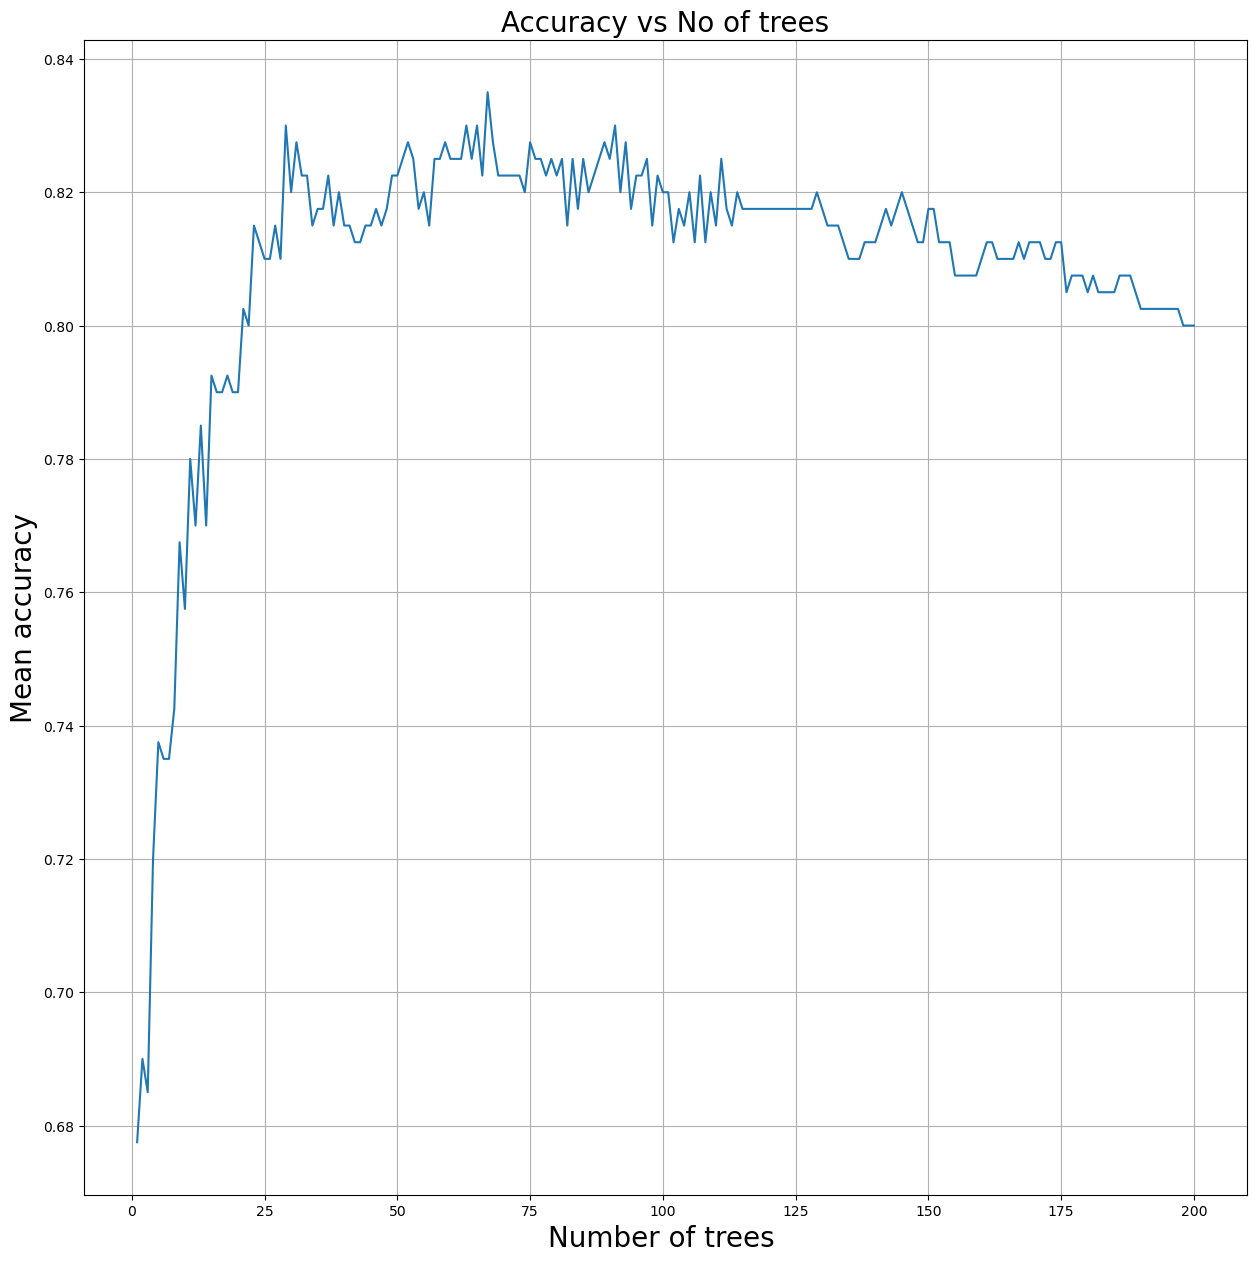

In [13]:
plt.figure(figsize=(15,15))
plt.plot(range(1,201), accuracy)
plt.xlabel("Number of trees ", fontsize=20)
plt.ylabel("Mean accuracy", fontsize=20)
plt.title("Accuracy vs No of trees", fontsize=20)
plt.grid()
plt.show()

In [56]:
ideal = accuracy.index(max(accuracy))
ideal

66

In [57]:
forest = RandomForestClassifier(n_estimators= ideal, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=66, random_state=42)

C:\Users\marang\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


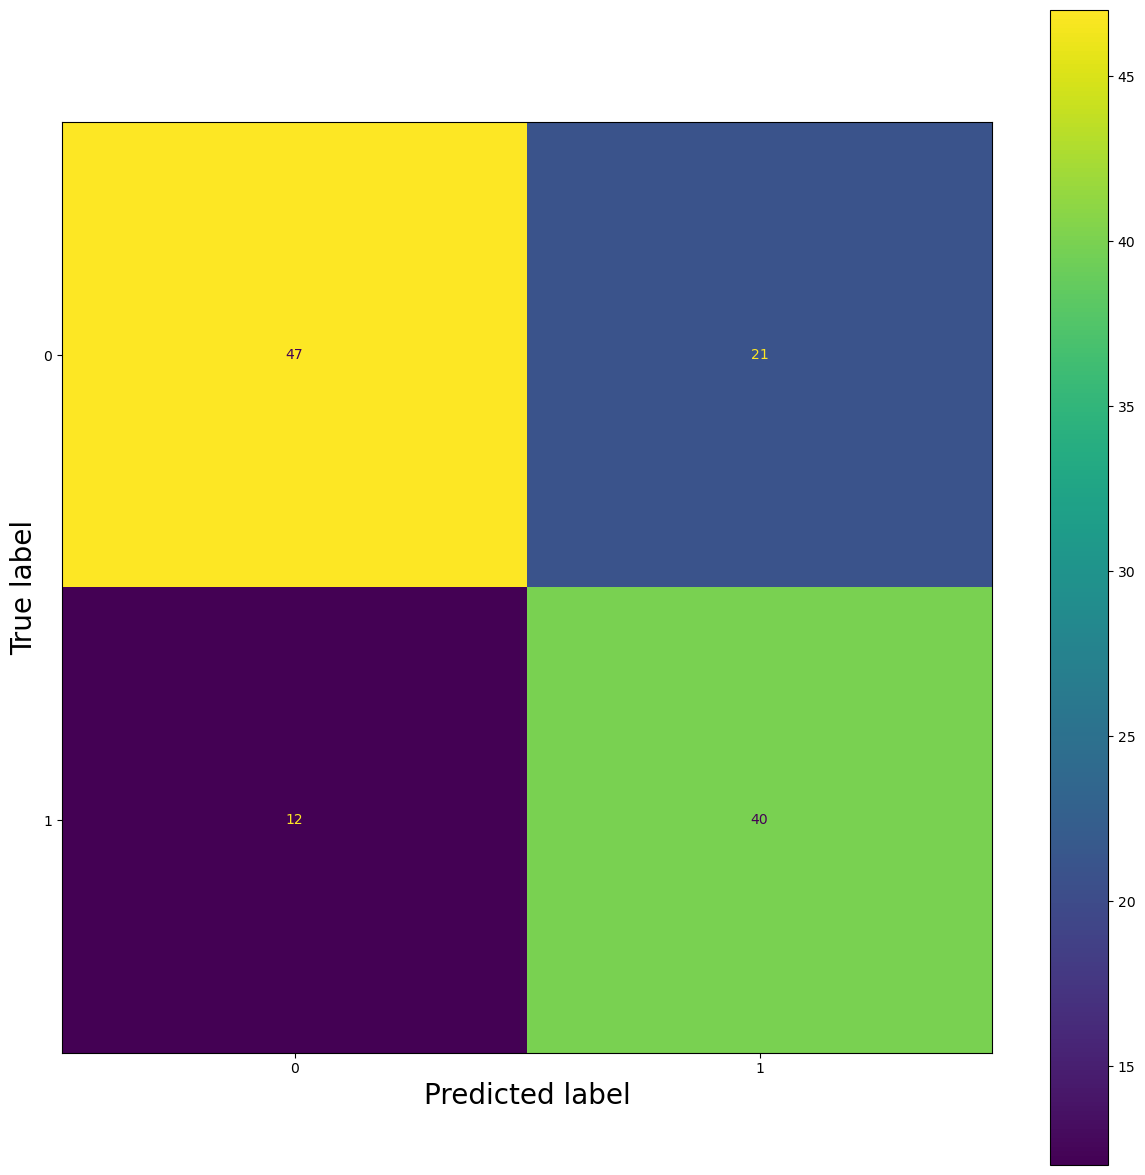

In [58]:
flg, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(forest, X_test, y_test, ax = ax)
ax.set_xlabel("Predicted label", fontsize=20)
ax.set_ylabel("True label", fontsize=20)
plt.show()

In [62]:
num_trees = 66
max_features = "sqrt"
clf_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, max_depth=10)
clf_rf.fit(X_train, y_train)
results = cross_val_score(clf_rf, X, y, cv=10)
print(results.mean())

0.785


In [63]:
y_pred = pd.DataFrame(clf_rf.predict(X_test))

In [64]:
roc_auc_score(y_test, y_pred)

0.744343891402715

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.66      0.74        68
           1       0.65      0.83      0.73        52

    accuracy                           0.73       120
   macro avg       0.74      0.74      0.73       120
weighted avg       0.75      0.73      0.73       120



<AxesSubplot:xlabel='importance', ylabel='feature'>

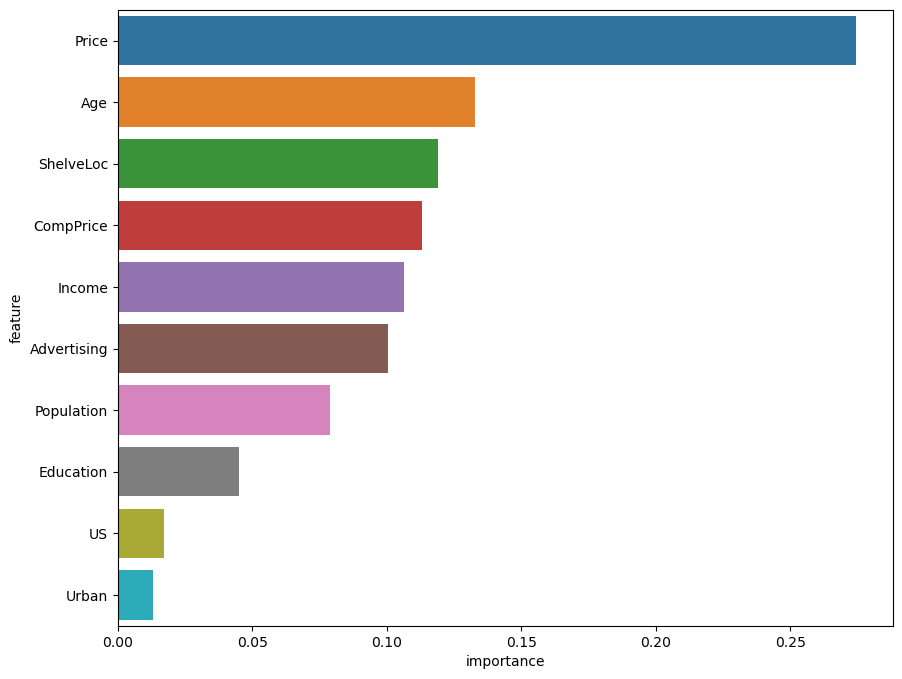

In [66]:
fn = pd.DataFrame({"feature": X_train.columns, "importance": clf_rf.feature_importances_})
fn = fn.sort_values("importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(y="feature", x = "importance", data=fn)

# Q 2

In [67]:
fraud = pd.read_csv("Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [68]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [69]:
fraud.loc[fraud["Taxable.Income"]>=30000,"income_30k"] = "0"
fraud.loc[fraud["Taxable.Income"]< 30000,"income_30k"] = "1"
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income_30k
0,NO,Single,68833,50047,10,YES,0
1,YES,Divorced,33700,134075,18,YES,0
2,NO,Married,36925,160205,30,YES,0
3,YES,Single,50190,193264,15,YES,0
4,NO,Married,81002,27533,28,NO,0
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,0
596,YES,Divorced,69967,55369,2,YES,0
597,NO,Divorced,47334,154058,0,YES,0
598,YES,Married,98592,180083,17,NO,0


In [70]:
fraud["income_30k"].value_counts()

0    476
1    124
Name: income_30k, dtype: int64

In [71]:
le = preprocessing.LabelEncoder()
for i in fraud.columns:
    if fraud[i].dtype == object:
        fraud[i] = le.fit_transform(fraud[i])
        
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income_30k
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [72]:
fraud.drop(["Taxable.Income","City.Population"], axis=1, inplace=True)

In [73]:
fraud

,Undergrad,Marital.Status,Work.Experience,Urban,income_30k
0,0,2,10,1,0
1,1,0,18,1,0
2,0,1,30,1,0
3,1,2,15,1,0
4,0,1,28,0,0
...,...,...,...,...,...
595,1,0,7,1,0
596,1,0,2,1,0
597,0,0,0,1,0
598,1,1,17,0,0


In [74]:
X = fraud.iloc[:,:4]
y = fraud.iloc[:,4]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [76]:
params = [{"criterion": ["gini", "entropy"], "max_depth" : [10, 200], "n_estimators" : [10, 200], "max_features": ["sqrt", 0.3]}]

rnd = RandomForestClassifier()
clf = GridSearchCV(rnd, params, cv=7, scoring="roc_auc")
clf.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 200], 'max_features': ['sqrt', 0.3],
                          'n_estimators': [10, 200]}],
             scoring='roc_auc')

In [77]:
clf.best_estimator_

RandomForestClassifier(max_depth=10, max_features=0.3, n_estimators=10)

In [78]:
kfold = KFold(10)
accuracy = []
for i in range(1, 201):
    forest = RandomForestClassifier(random_state=42, n_estimators= i)
    result = cross_val_score(forest, X, y, cv = kfold)
    accuracy.append(np.mean(result))

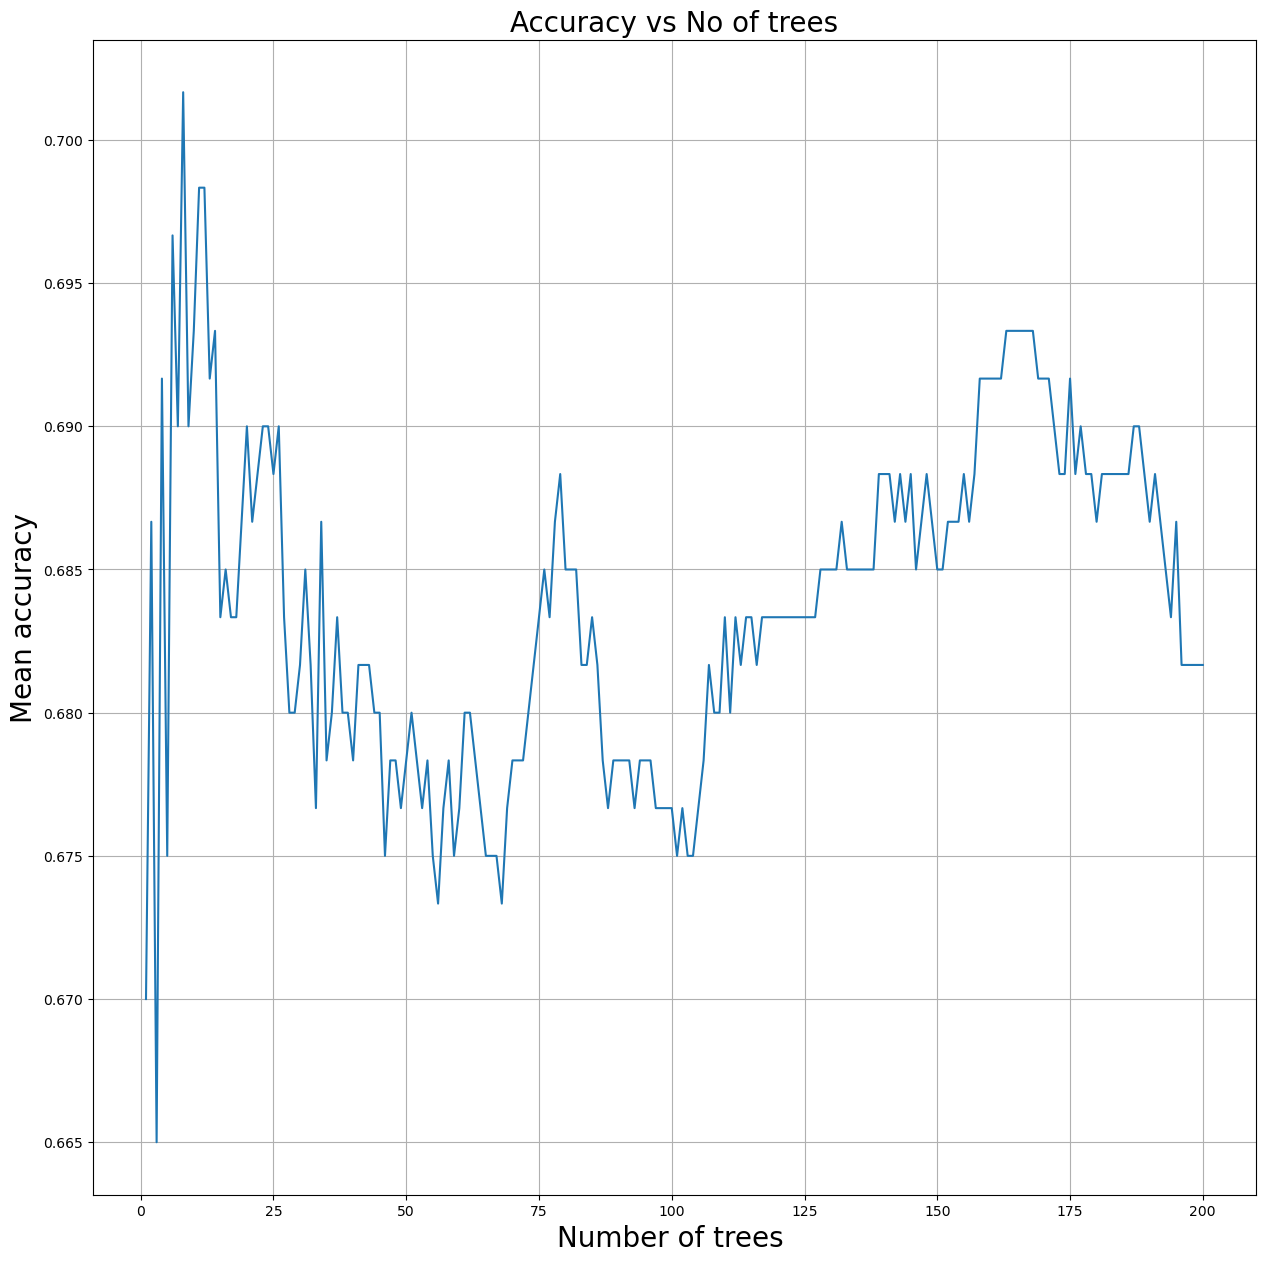

In [79]:
plt.figure(figsize=(15,15))
plt.plot(range(1,201), accuracy)
plt.xlabel("Number of trees ", fontsize=20)
plt.ylabel("Mean accuracy", fontsize=20)
plt.title("Accuracy vs No of trees", fontsize=20)
plt.grid()
plt.show()

In [80]:
ideal = accuracy.index(max(accuracy))
ideal

7

In [81]:
forest = RandomForestClassifier(n_estimators= ideal, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=7, random_state=42)

C:\Users\marang\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


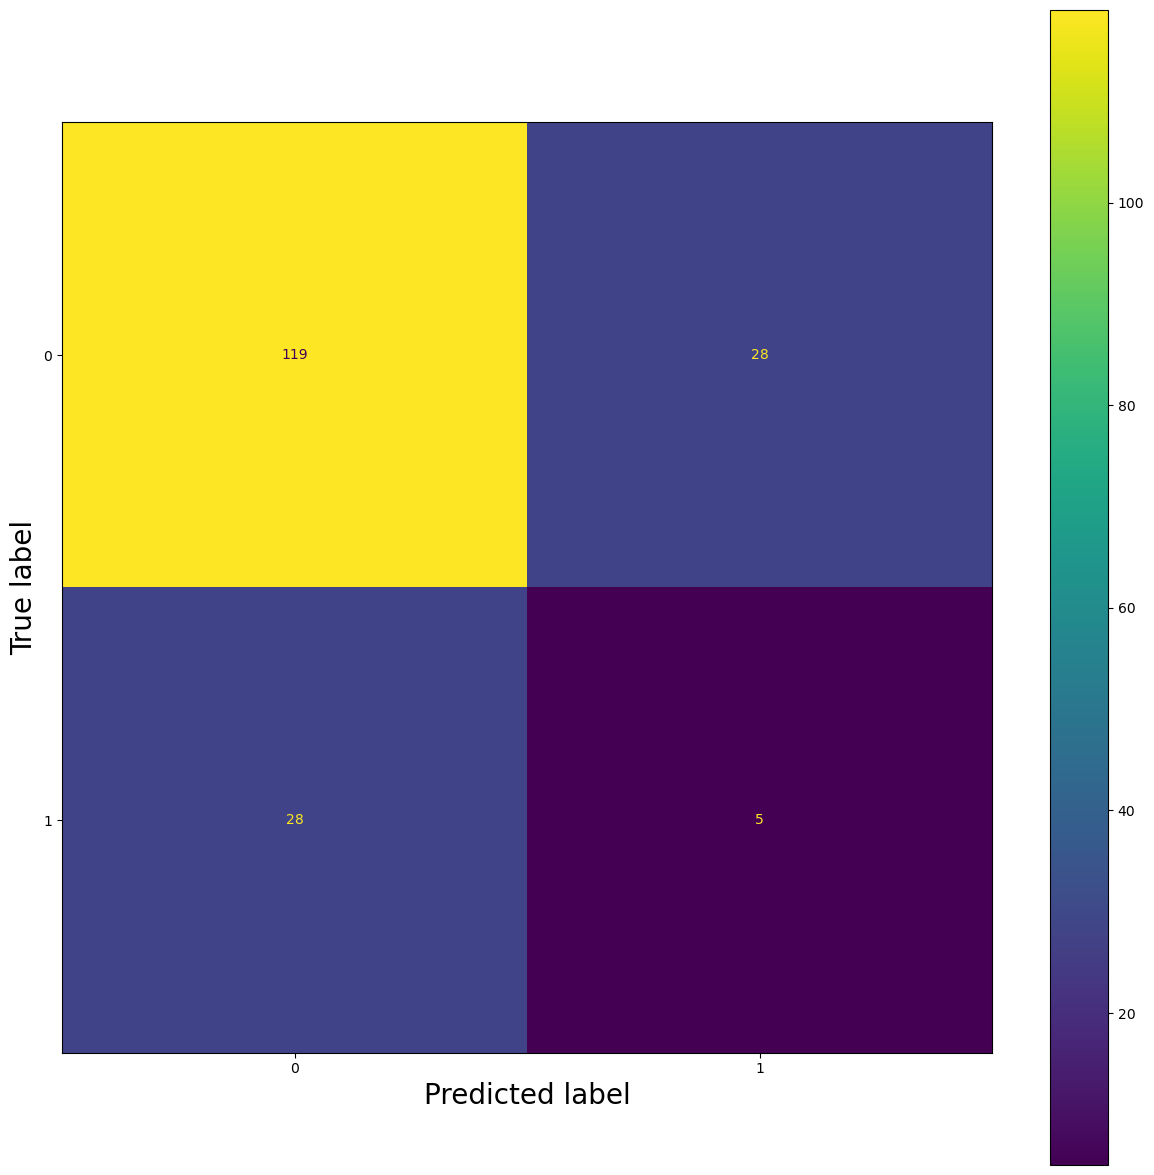

In [82]:
flg, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(forest, X_test, y_test, ax = ax)
ax.set_xlabel("Predicted label", fontsize=20)
ax.set_ylabel("True label", fontsize=20)
plt.show()

In [100]:
num_trees = 7
max_features = 0.3
clf_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, max_depth=10, random_state=42)
clf_rf.fit(X_train, y_train)
results = cross_val_score(clf_rf, X, y, cv=10)
print(results.mean())

0.6900000000000001


In [101]:
y_pred = pd.DataFrame(clf_rf.predict(X_test))

In [104]:
roc_auc_score(y_test, y_pred)

0.492269635126778

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       147
           1       0.17      0.18      0.18        33

    accuracy                           0.69       180
   macro avg       0.49      0.49      0.49       180
weighted avg       0.70      0.69      0.69       180



<AxesSubplot:xlabel='importance', ylabel='feature'>

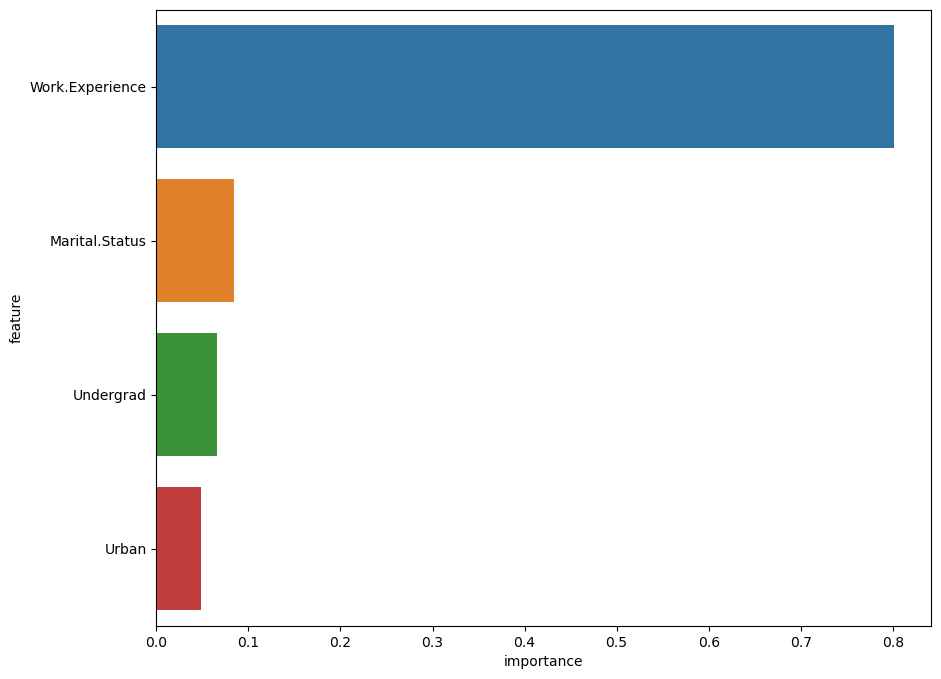

In [106]:
fn = pd.DataFrame({"feature": X_train.columns, "importance": clf_rf.feature_importances_})
fn = fn.sort_values("importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(y="feature", x = "importance", data=fn)